In [1]:
# Warning: usually don't do this kind of inclusion : using *, you 'merge' the namespaces
#          but in this case we actually want to mimic the imports as if they were imported here
from src.setup import *

# This prevents to restart the kernel whenever an external custom file is edited
%load_ext autoreload
%autoreload 2

# Introduction

## Import .csv file into DataFrame

Contained in the .csv file `data/g2g-hbv/to_fellay_manifest.csv`

In [2]:
ls

*/                                       __main__.py
BACKUP/                                  opt/
Clinical data.ipynb                      Presentation.ipynb
data/                                    README.md
G2G - Asian individuals.ipynb            res/
G2G computer.ipynb                       results/
G2G computer.ipynb.BACKUP                src/
Host genotypes - Analysis.ipynb          tests/
Host genotypes - Data preparation.ipynb  tmp/
__init__.py                              tutorial/
Interpretation of results.ipynb          Untitled1.ipynb
Joint viral and clinical data.ipynb      Viral data.ipynb


In [3]:
df = pd.read_csv(PATH_CLINICAL_RAW_DATA)
print(df.head(2))

      IGM_ID Viral_Sequencing_Status  AVG_COVERAGE              USUBJID  \
0  igm160234           Seq available         14150  GS-US-320-0108-1001   
1  igm160214           Seq available          8940  GS-US-320-0108-1002   

          STUDYID  SUBJID  Screening ID GT COUNTRY               ETHNICITY  \
0  GS-US-320-0108    1001           NaN  B     USA  NOT HISPANIC OR LATINO   
1  GS-US-320-0108    1002           NaN  C     USA  NOT HISPANIC OR LATINO   

   ... SEX   AGE  OAV_EXPERIENCE BASELINE_HBEAG_STATUS BASELINE_BMI  \
0  ...   M  52.0               N              Negative    25.968033   
1  ...   F  64.0               N              Negative    19.607157   

   BASELINE_ALT_U/L  BASELINE_HBSAG_log10_IU/mL  BASELINE_HBVDNA_IU/mL  \
0                45                    2.517934                 503000   
1                53                    2.887071                 117000   

  BASELINE_HBVDNA_Dil_IU/mL            gilead_id  
0                       NaN  GS-US-320-0108-1001  


In [4]:
print("Shape =", df.shape)
print(df.columns)

Shape = (725, 21)
Index(['IGM_ID', 'Viral_Sequencing_Status', 'AVG_COVERAGE', 'USUBJID',
       'STUDYID', 'SUBJID', 'Screening ID', 'GT', 'COUNTRY', 'ETHNICITY',
       'RACE', 'SEX', 'AGE', 'OAV_EXPERIENCE', 'BASELINE_HBEAG_STATUS',
       'BASELINE_BMI', 'BASELINE_ALT_U/L', 'BASELINE_HBSAG_log10_IU/mL',
       'BASELINE_HBVDNA_IU/mL', 'BASELINE_HBVDNA_Dil_IU/mL', 'gilead_id'],
      dtype='object')


In [5]:
df.count()

IGM_ID                        725
Viral_Sequencing_Status       725
AVG_COVERAGE                  725
USUBJID                       725
STUDYID                       725
SUBJID                        725
Screening ID                    0
GT                            725
COUNTRY                       725
ETHNICITY                     725
RACE                          725
SEX                           725
AGE                           724
OAV_EXPERIENCE                593
BASELINE_HBEAG_STATUS         725
BASELINE_BMI                  724
BASELINE_ALT_U/L              725
BASELINE_HBSAG_log10_IU/mL    725
BASELINE_HBVDNA_IU/mL         724
BASELINE_HBVDNA_Dil_IU/mL     256
gilead_id                     725
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 21 columns):
IGM_ID                        725 non-null object
Viral_Sequencing_Status       725 non-null object
AVG_COVERAGE                  725 non-null int64
USUBJID                       725 non-null object
STUDYID                       725 non-null object
SUBJID                        725 non-null int64
Screening ID                  0 non-null float64
GT                            725 non-null object
COUNTRY                       725 non-null object
ETHNICITY                     725 non-null object
RACE                          725 non-null object
SEX                           725 non-null object
AGE                           724 non-null float64
OAV_EXPERIENCE                593 non-null object
BASELINE_HBEAG_STATUS         725 non-null object
BASELINE_BMI                  724 non-null float64
BASELINE_ALT_U/L              725 non-null int64
BASELINE_HBSAG_log10_IU/mL    725 non-null floa

# Process variables

In [7]:
ids = ['USUBJID', 'IGM_ID', 'STUDYID', 'SUBJID', 'gilead_id', 'Screening ID']

## Change data type

### Continuous variables

We could change AGE to integers.

### Categorical data

Instead of having `object` types, we want to have pandas categories in the DataFrame (it saves storage space, although it's not really needed here, given the size of the DataFrame). We thus make a simple conversion.

In [8]:
def to_category(df, var_list) :
    """Transforms the columns of the DataFrame into pandas categories"""
    for v in var_list :
        df[v] = df[v].astype('category')

In [9]:
to_category(df, ['Viral_Sequencing_Status', 'SEX', 'GT', 'COUNTRY', 'ETHNICITY', 
                 'RACE', 'OAV_EXPERIENCE', 'BASELINE_HBEAG_STATUS'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 21 columns):
IGM_ID                        725 non-null object
Viral_Sequencing_Status       725 non-null category
AVG_COVERAGE                  725 non-null int64
USUBJID                       725 non-null object
STUDYID                       725 non-null object
SUBJID                        725 non-null int64
Screening ID                  0 non-null float64
GT                            725 non-null category
COUNTRY                       725 non-null category
ETHNICITY                     725 non-null category
RACE                          725 non-null category
SEX                           725 non-null category
AGE                           724 non-null float64
OAV_EXPERIENCE                593 non-null category
BASELINE_HBEAG_STATUS         725 non-null category
BASELINE_BMI                  724 non-null float64
BASELINE_ALT_U/L              725 non-null int64
BASELINE_HBSAG_log10_IU/mL    7

# Univariate distributions exploration

## Value counts

### Categorical variables

In [10]:
# Viral sequencing status
df['Viral_Sequencing_Status'].value_counts()

Seq available    725
Name: Viral_Sequencing_Status, dtype: int64

In [11]:
df['GT'].value_counts()

C                          391
D                          154
B                          124
A                           41
E                            7
F                            3
H                            2
Mixed genotype detected      1
Mixed                        1
G                            1
Name: GT, dtype: int64

In [12]:
df['COUNTRY'].value_counts()

KOR    138
HKG    127
CAN     96
USA     83
RUS     55
JPN     48
ROU     47
ITA     32
NZL     24
POL     22
AUS     15
GBR     14
TUR     11
SGP      6
FRA      3
ESP      2
BGR      2
Name: COUNTRY, dtype: int64

In [13]:
df['ETHNICITY'].value_counts()

NOT HISPANIC OR LATINO    721
NOT PERMITTED               3
HISPANIC OR LATINO          1
Name: ETHNICITY, dtype: int64

In [14]:
df['RACE'].value_counts()

ASIAN                                        534
WHITE                                        174
BLACK OR AFRICAN AMERICAN                     10
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER      5
OTHER                                          2
Name: RACE, dtype: int64

In [15]:
df['SEX'].value_counts()

M    459
F    266
Name: SEX, dtype: int64

In [16]:
df['OAV_EXPERIENCE'].value_counts()

N    459
Y    134
Name: OAV_EXPERIENCE, dtype: int64

In [17]:
df['BASELINE_HBEAG_STATUS'].value_counts()

Positive    438
Negative    287
Name: BASELINE_HBEAG_STATUS, dtype: int64

## Quantitative variables



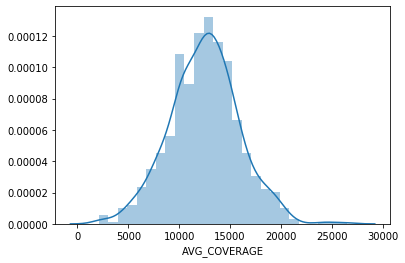

In [18]:
sns.distplot(df.AVG_COVERAGE);

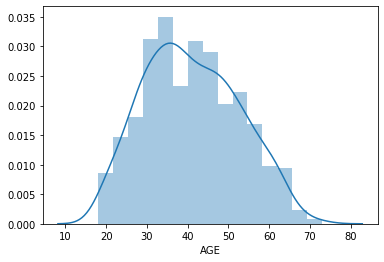

In [19]:
sns.distplot(df.AGE.dropna());

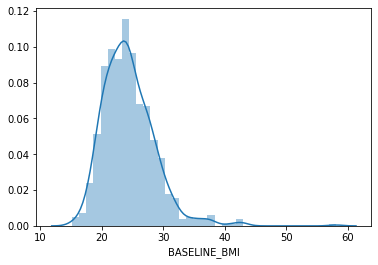

In [20]:
sns.distplot(df.BASELINE_BMI.dropna());

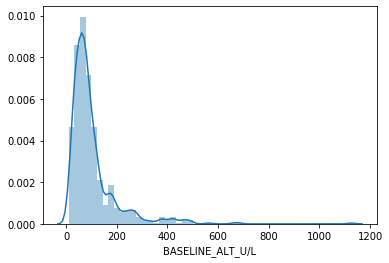

In [21]:
sns.distplot(df['BASELINE_ALT_U/L']);

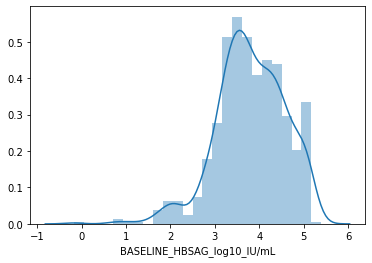

In [22]:
sns.distplot(df['BASELINE_HBSAG_log10_IU/mL']);

For ` BASELINE_HBVDNA_IU/mL` variable: integer values, except two values: `>110000000` and `>170000000`. We see that the majority of the individuals belong to one of the two 'string modalities'.

In [23]:
df['BASELINE_HBVDNA_IU/mL'].value_counts().head()

>110000000    220
>170000000     10
10600000        4
1250000         3
105000          3
Name: BASELINE_HBVDNA_IU/mL, dtype: int64

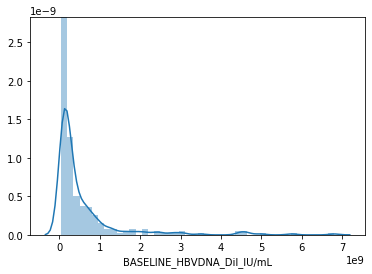

In [24]:
sns.distplot(df['BASELINE_HBVDNA_Dil_IU/mL'].dropna());

# Multivariate exploration

## Heatmap

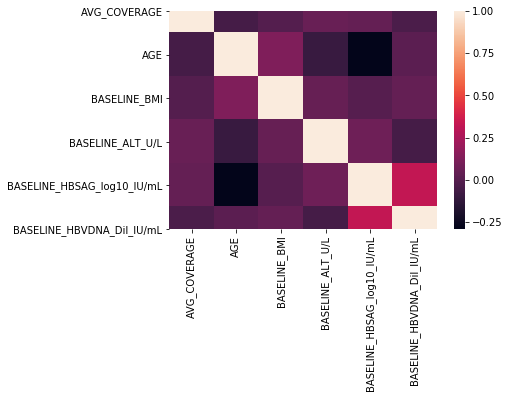

In [25]:
sns.heatmap(df.drop(ids, axis=1).corr())

(array([-5.e+09,  0.e+00,  5.e+09,  1.e+10]),
 <a list of 4 Text xticklabel objects>)

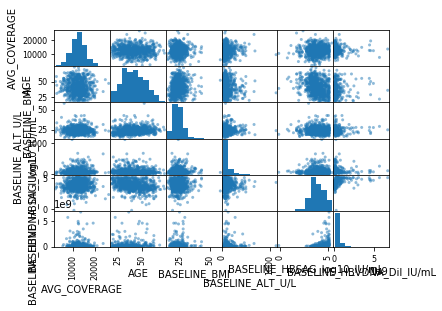

In [26]:
pd.plotting.scatter_matrix(df.drop(ids, axis=1))
plt.xticks(rotation=45)
plt.xticks(rotation=0)

## Age and sex

In [27]:
males = df[df.SEX == 'M']
print("Males:\t\tmean = {:.4}\tmedian = {}\tSD = {:.4}"
     .format(males.AGE.mean(), males.AGE.median(), males.AGE.std()))
females = df[df.SEX == 'F']
print("Females:\tmean = {:.4}\tmedian = {}\tSD = {:.4}"
     .format(females.AGE.mean(), females.AGE.median(), females.AGE.std()))

Males:		mean = 40.38	median = 39.0	SD = 11.3
Females:	mean = 42.0	median = 42.0	SD = 11.94


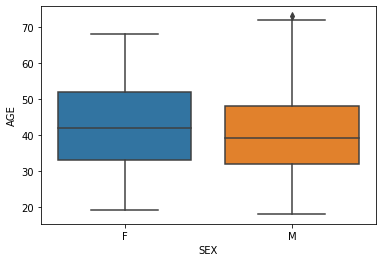

In [28]:
sns.boxplot(x='SEX', y='AGE', data=df);

## Country/race and age

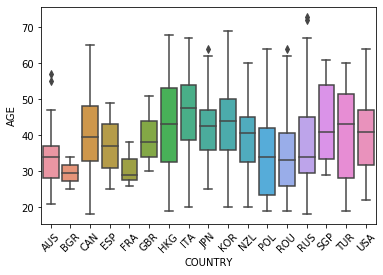

In [29]:
sns.boxplot(x='COUNTRY', y='AGE', data=df);
plt.xticks(rotation=45);

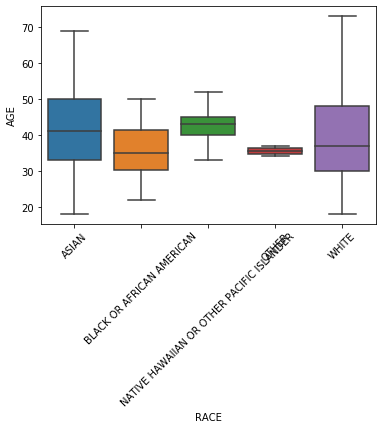

In [30]:
sns.boxplot(x='RACE', y='AGE', data=df);
plt.xticks(rotation=45);

For the Age/Country plot, we should **sort them with respect to the median y value**. To do this we'll group data with respect to the country. Eventually we must provide a list of strings to a plotting function with the param `order`.

In [31]:
# Group data
df_country_median = df.groupby('COUNTRY').median()
# Sort
df_country_median.sort_values(by='AGE', inplace=True)
# Get the list of the countries 
countries_order = df_country_median.index.values

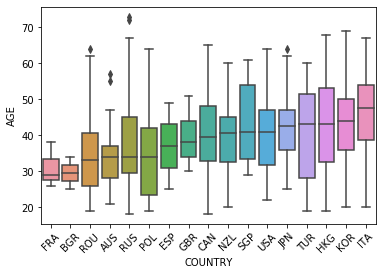

In [32]:
sns.boxplot(x='COUNTRY', y='AGE', data=df, order = countries_order);
plt.xticks(rotation=45);

## Country and BASELINE_HBSAG_log10_IU/mL 
Again, we order them with respect to the y values.

In [33]:
# Group data
df_baselineHBSAG = df.groupby('COUNTRY').median()
# Sort
df_baselineHBSAG.sort_values(by='BASELINE_HBSAG_log10_IU/mL', inplace=True)
# Get the list of the countries 
baselineHBSAG_order = df_baselineHBSAG.index.values

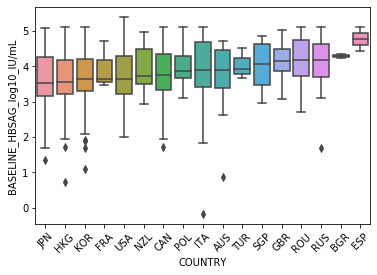

In [34]:
sns.boxplot(x='COUNTRY', y='BASELINE_HBSAG_log10_IU/mL', data=df, order = baselineHBSAG_order);
plt.xticks(rotation=45);

# Variable transformation

## BASELINE_ALT_U/L

We apply log10 transformation:

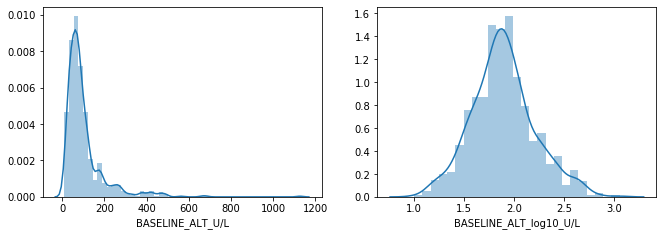

In [35]:
df['BASELINE_ALT_log10_U/L'] = df['BASELINE_ALT_U/L'].apply(lambda x:np.log10(x))
# See how it looks now
fig, ax = plt.subplots(1,2, figsize=(11,3.5))
sns.distplot(df['BASELINE_ALT_U/L'], ax=ax[0]);
sns.distplot(df['BASELINE_ALT_log10_U/L'], ax=ax[1]);

## BASELINE_HBVDNA_Dil_IU/mL



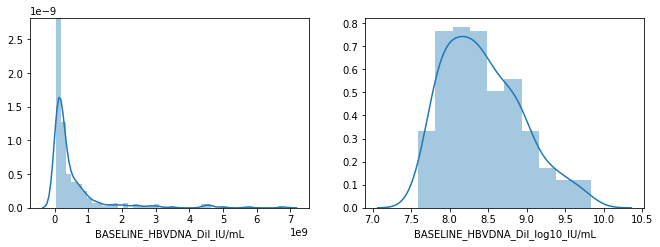

In [36]:
df['BASELINE_HBVDNA_Dil_log10_IU/mL'] = df['BASELINE_HBVDNA_Dil_IU/mL'].apply(lambda x:np.log10(x))
# See how it looks now
fig, ax = plt.subplots(1,2, figsize=(11,3.5))
sns.distplot(df['BASELINE_HBVDNA_Dil_IU/mL'].dropna(), ax=ax[0]);
sns.distplot(df['BASELINE_HBVDNA_Dil_log10_IU/mL'].dropna(), ax=ax[1]);

# Finalization

Mainly based on Sina'a remarks. 

## Pathogen sub-group

`Mixed genotype detected` and `Mixed` seem to be the same. Let's code them the same way. 


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 23 columns):
IGM_ID                             725 non-null object
Viral_Sequencing_Status            725 non-null category
AVG_COVERAGE                       725 non-null int64
USUBJID                            725 non-null object
STUDYID                            725 non-null object
SUBJID                             725 non-null int64
Screening ID                       0 non-null float64
GT                                 725 non-null category
COUNTRY                            725 non-null category
ETHNICITY                          725 non-null category
RACE                               725 non-null category
SEX                                725 non-null category
AGE                                724 non-null float64
OAV_EXPERIENCE                     593 non-null category
BASELINE_HBEAG_STATUS              725 non-null category
BASELINE_BMI                       724 non-null float64


In [38]:
df['GT'].replace('Mixed genotype detected', 'Mixed', inplace=True)
df.GT.cat.remove_unused_categories(inplace=True)
# Check
df.GT.value_counts()

C        391
D        154
B        124
A         41
E          7
F          3
Mixed      2
H          2
G          1
Name: GT, dtype: int64

## Keep only useful variables

> keep only the following for further analysis: IGM_ID (host id), gilead_id (pathogen_id), GT, COUNTRY, ETHNICITY, RACE, SEX, AGE, OAV_EXPERIENCE, BASELINE_HBVDNA_IU/mL, BASELINE_HBVDNA_Dil_IU/mL, BASELINE_HBEAG_STATUS.

For `BASELINE_HBVDNA_Dil_log10_IU/mL`, we made a log10-transformation, so we put it in the new table too. We also add `BASELINE_BMI` since we will use it for association analysis with the host genotype data. Finally, we **store the final clinical data into a binary file**.

In [39]:
to_keep = ['IGM_ID', 'gilead_id', 'GT', 'COUNTRY', 'ETHNICITY', 'RACE', 'SEX',
          'AGE', 'OAV_EXPERIENCE', 'BASELINE_BMI', 'BASELINE_HBVDNA_IU/mL', 
           'BASELINE_HBVDNA_Dil_IU/mL', 'BASELINE_HBVDNA_Dil_log10_IU/mL', 'BASELINE_HBEAG_STATUS']
df2 = df[to_keep]
df2.GT.cat.remove_unused_categories(inplace=True)

## Store the dataframe structure


In [40]:
with open(PATH_CLINICAL_DATA, 'wb') as file:
    pickler = pickle.Pickler(file)
    pickler.dump(df2)

## Store dataframe of covariates

We want to center-scale the age, apply inverse normal transformation to BMI, code sex with 0 and 1.


In [41]:
covars = df2[['IGM_ID', 'gilead_id', 'SEX', 'AGE']]

In [42]:
def center_scale(series):
    return (series - series.mean())/series.std()

In [43]:
#covars.AGE = covars.AGE.transform(center_scale)

In [44]:
covars.SEX = covars.SEX.map({'M':1, 'F':0})

/home/mazeller/.local/lib/python3.6/site-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [45]:
with open(PATH_CLINICAL_DATA_TRANSFORMED, 'wb') as file:
    pickler = pickle.Pickler(file)
    pickler.dump(covars)